<a href="https://colab.research.google.com/github/Joannechiao18/DCGAN/blob/main/cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import keras
from keras.datasets import cifar10
from keras.layers import Activation, Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization
from keras.models import Sequential, load_model
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import load_model

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


In [ ]:
def lr_decay(epoch):
    lr = 0.001
    
    if epoch > 30: 
        for e in range(epoch - 30):
            lr*=0.98
            
    return lr

In [ ]:
validation_rate = 0.2
IMAGE_SIZE = 32            
BATCH_SIZE = 700           

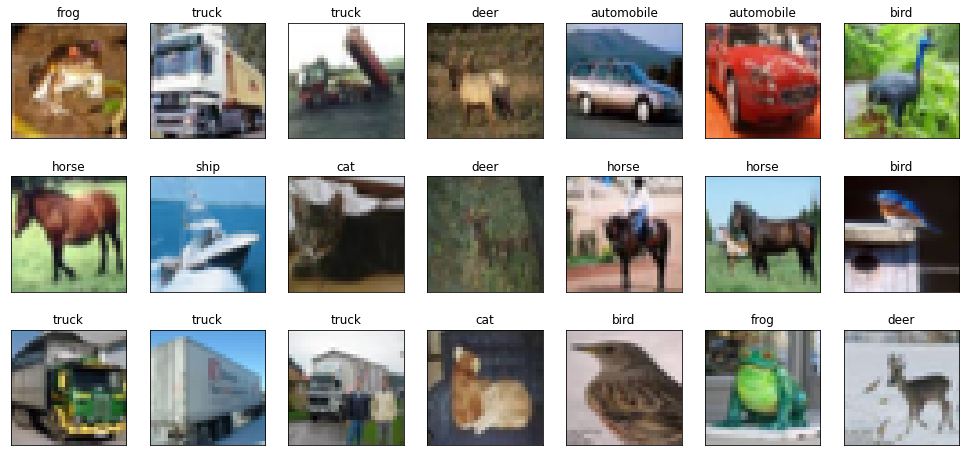

In [ ]:
fig, img = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))

labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

index=0
#print(y_train[index])
for i in range(3):
  for j in range(7):
    img[i,j].set_title(labels[y_train[index][0]])
    img[i,j].imshow(X_train[index])
    img[i,j].get_xaxis().set_visible(False)
    img[i,j].get_yaxis().set_visible(False)
    index += 1
plt.show()

In [ ]:
X_test  = X_test / 255.0   

y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
train_datagen = ImageDataGenerator(     
    rescale=1.0 / 255,       
    rotation_range=20,       
    #width_shift_range=0.2,   
    #height_shift_range=0.2,  
    #shear_range=0.2,         
    #zoom_range=0.2,          
)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    shuffle = True,
    batch_size=BATCH_SIZE,
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255,)

validation_generator = validation_datagen.flow(
    X_val,
    y_val,
    batch_size=BATCH_SIZE,
)


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
 
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',                
    metrics=['accuracy']
)

In [ ]:
lr_change = LearningRateScheduler(lr_decay)

In [ ]:
#history = model.fit(X_train, y_train, epochs=100, batch_size=BATCH_SIZE, validation_data=(X_val, y_val), verbose=1, callbacks=[lr_change])
history=model.fit_generator(
    train_generator,                      
    epochs=100,                         
    steps_per_epoch=X_train.shape[0] / BATCH_SIZE,      
    validation_data=validation_generator, 
    validation_steps=X_val.shape[0] / BATCH_SIZE,
    verbose=1,
    callbacks=[lr_change],
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
57/57 [==============================] - 67s 328ms/step - loss: 2.5512 - accuracy: 0.2482 - val_loss: 3.0351 - val_accuracy: 0.1044
Epoch 2/100
57/57 [==============================] - 17s 291ms/step - loss: 1.7135 - accuracy: 0.4032 - val_loss: 3.5829 - val_accuracy: 0.1046
Epoch 3/100
57/57 [==============================] - 16s 286ms/step - loss: 1.4806 - accuracy: 0.4814 - val_loss: 3.3753 - val_accuracy: 0.1321
Epoch 4/100
57/57 [==============================] - 18s 311ms/step - loss: 1.3423 - accuracy: 0.5292 - val_loss: 3.1253 - val_accuracy: 0.1867
Epoch 5/100
57/57 [==============================] - 18s 307ms/step - loss: 1.2464 - accuracy: 0.5665 - val_loss: 3.0240 - val_accuracy: 0.2223
Epoch 6/100
57/57 [==============================] - 16s 284ms/step - loss: 1.1435 - accuracy: 0.5992 - val_loss: 2.4004 - val_accuracy: 0.3153
Epoch 7/100
57/57 [==============================] - 16s 280ms/step - loss: 1.0722 - accuracy: 0.6199 - val_loss: 2.1473 - val_accuracy:

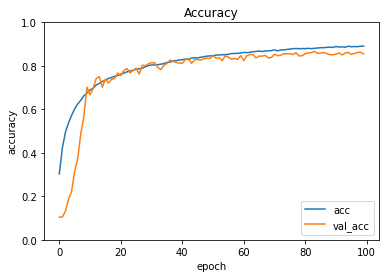

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0.00, 1.00])
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()

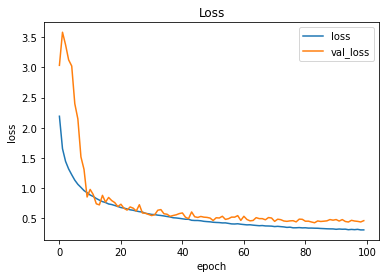

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 2s 4ms/step - loss: 0.5053 - accuracy: 0.8463


In [ ]:
model.save("cifar_10_model.h5")

In [ ]:
model = keras.models.load_model("cifar_10_model.h5")

In [ ]:
prediction=model.predict_classes(X_test)

label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

def plot_images_labels_prediction(images, labels, prediction, idx, num):
    fig = plt.gcf()
    fig.set_size_inches(20, 20)  #一個圖片大小
    for i in range(0, num):
        img=plt.subplot(12,12, 1+i)  #6x6表格
        img.imshow(images[idx])

        buf=to_categorical(prediction[i], 10)

        if len(prediction)>0:
          title=label_dict[prediction[i]]
          if (buf == y_test[i]).all():
            img.set_title(title,fontsize=15,color='black') 
          else:
            img.set_title(title,fontsize=15,color='red') 
            
        img.set_xticks([]);img.set_yticks([])        
        idx+=1 
    plt.show()

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


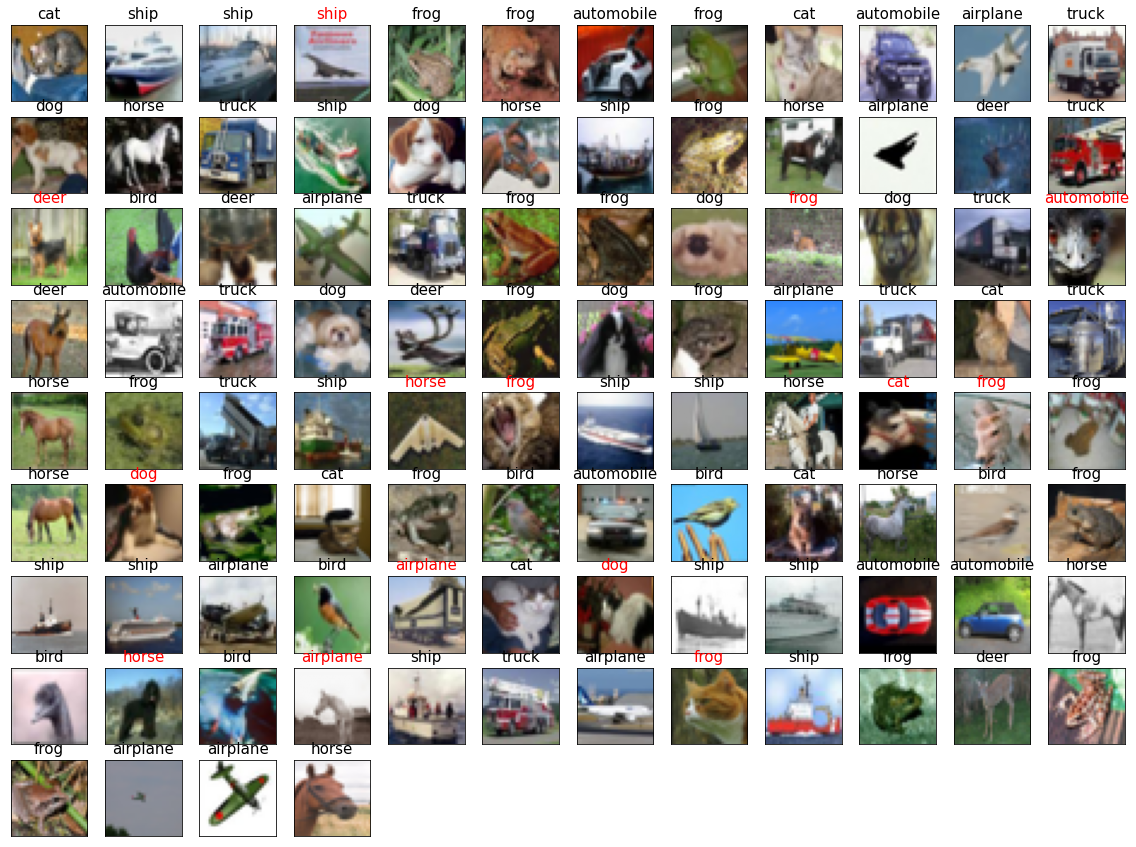

In [ ]:
plot_images_labels_prediction(X_test, y_test, prediction, 0, 100)